The following URL is valid, for example, even though it includes a duplicate id parameter:  
  
`/products?id=123&id=456`

In [ ]:
//if send above url to this endpoint
app.MapGet("/products", (int id) => $"Received {id}");

//you get 400 BadRequest response

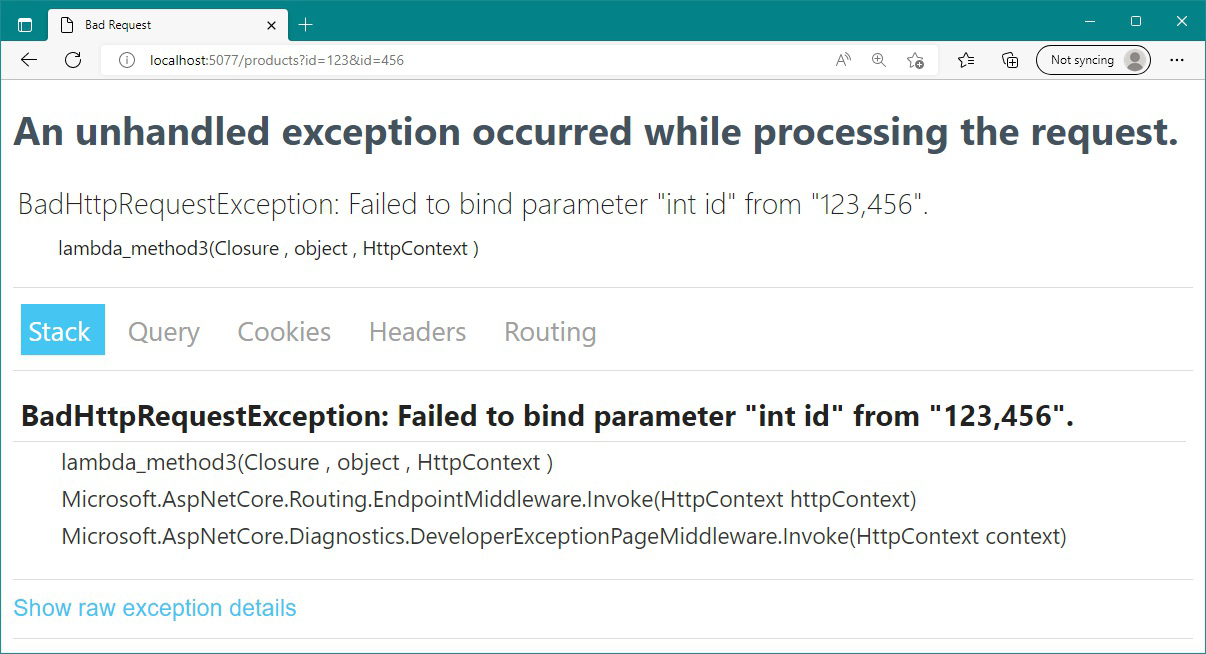

If you want to handle query strings like this one, so that users can optionally pass multiple possible values for a parameter, `you need to use arrays`.

In [ ]:
WebApplicationBuilder builder = WebApplication.CreateBuilder(args)

WebApplication app = builder.Build();

app.MapGet("/products/search",
    (int[] id) => $"Received {id.Length} ids"); //id not ids

app.Run();


You can ***control the name of the target*** that a handler parameter binds to by using the `[FromQuery]` and `[FromRoute]` attributes, similar to the way you use `[FromHeader]`.

In [ ]:
app.MapGet("/products/search",
    ([FromQuery(Name = "id")] int[] ids) => $"Received {ids.Length}");

arrays work only if
- You’re using an HTTP verb that typically `doesn’t include a request body`, such as `GET`, `HEAD`, or `DELETE`.
- The ***array*** is an `array of simple types` (or string[] or StringValues).

If either of ***these statements is not true***, ASP.NET Core will attempt to `bind the array to the JSON body` of the request instead.